In [ ]:
# Natural Language Processing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [9]:
from google.colab import files
upload = files.upload()

Saving data.csv to data.csv


In [10]:
input=list(upload.keys())
input=input[0]
print(input)

data.csv


In [11]:
extension= input.split(".")
print(extension[1])

csv


In [12]:
#  read the CSV file and look at the first five rows of the data:

dataset = pd.read_csv('data.csv')

dataset.head()

,text,class
0,Now all @Apple has to do is get swype on the i...,1
1,@Apple will be adding more carrier support to ...,1
2,Hilarious @youtube video - guy does a duet wit...,1
3,@RIM you made it too easy for me to switch to ...,1
4,I just realized that the reason I got into twi...,1


In [13]:
print(dataset)

                                                  text  class
0    Now all @Apple has to do is get swype on the i...      1
1    @Apple will be adding more carrier support to ...      1
2    Hilarious @youtube video - guy does a duet wit...      1
3    @RIM you made it too easy for me to switch to ...      1
4    I just realized that the reason I got into twi...      1
..                                                 ...    ...
474  Houston we have a problem!! My iPad has been r...      0
475  #Siri went down for a little while last night....      0
476  @ford should have teamed up with @Apple instea...      0
477  RT @gdcurry: Really @Apple?  What have you don...      0
478                                DAMN YOU !!! @apple      0

[479 rows x 2 columns]


In [14]:
dataset.shape[0]

479

In [15]:
#Print Information about data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    479 non-null    object
 1   class   479 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.6+ KB


In [16]:
#Data types of Columns
types = dataset.dtypes
print(types)

text     object
class     int64
dtype: object


In [17]:
#Count total number of classes in Data
class_counts = dataset.groupby('class').size()
print(class_counts)

class
0    316
1    163
dtype: int64


In [18]:
#Count total number of classes in Data
class_counts = dataset.groupby('text').size()
print(class_counts)

text
! Currently learning Mandarin for my upcoming trip to Hong Kong. I gotta hand it to @Apple iPhones & their uber useful flashcard apps           1
#10twitterpeopleiwouldliketomeet @coollike @TheGadgetShow  @thelittleappkid @Jon4Lakers @BenRubery @Apple @twitter @FXhomeHitFilm  (-2)         1
#DontBeMadAtMeBecause #Android is by far better than @Apple                                                                                     1
#Siri now knows who my dad mom brother and girlfriend is.  Thanks @apple                                                                        1
#Siri went down for a little while last night. Come on @apple! Get your shit together on this launch!                                           1
                                                                                                                                               ..
ugh! @apple youre reservation page for the iPhone is NOT working.                                                      

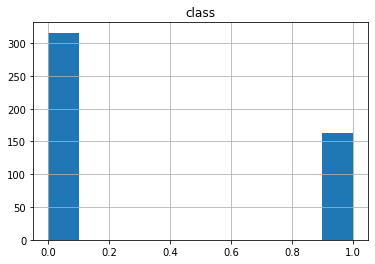

In [19]:
# Histogram plot
from matplotlib import pyplot
dataset.hist()
pyplot.show()

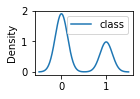

In [20]:
#Density Plot
dataset.plot(kind='density' ,subplots=True, layout=(3,3), sharex=False)
pyplot.show()

In [21]:

#Finding missing values
dataset.isnull().sum()

text     0
class    0
dtype: int64

In [22]:
# Removing index column
dataset = dataset.dropna()
dataset.reset_index(inplace = True) 
dataset = dataset.drop(['index'], axis = 1) 


In [25]:
text=dataset.loc[0][0]

In [24]:
# First step: cleaning Text and removing number and punctuation marks.
import re
review = re.sub('[^a-zA-Z]', ' ', dataset['text'][0])
print(text)
print('-------------------------------------------------')
print('Review after removing number and punctuation marks. ')
print(review)

Now all @Apple has to do is get swype on the iphone and it will be crack. Iphone that is
-------------------------------------------------
Review after removing number and punctuation marks. 
Now all  Apple has to do is get swype on the iphone and it will be crack  Iphone that is


In [26]:
# Second  step: converting text into lower case.
review=review.lower()
print(text)
print('-------------------------------------------------')
print('Text after convering into lower case')
print(review)

Now all @Apple has to do is get swype on the iphone and it will be crack. Iphone that is
-------------------------------------------------
Text after convering into lower case
now all  apple has to do is get swype on the iphone and it will be crack  iphone that is


In [27]:
# Third step: Removing stop words like 'this, the'
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
review = review.split()
print(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['now', 'all', 'apple', 'has', 'to', 'do', 'is', 'get', 'swype', 'on', 'the', 'iphone', 'and', 'it', 'will', 'be', 'crack', 'iphone', 'that', 'is']


In [28]:
# Third step: Removing stop words like 'this, the'
# set function is generally used for long article to fasten process
review1 = [word for word in review if not word in set(stopwords.words('english'))]
print('Text after removing stop words')
print(review1)

Text after removing stop words
['apple', 'get', 'swype', 'iphone', 'crack', 'iphone']


In [29]:
# Fourth step: converting stemming words
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
review = [ps.stem(word) for word in review1 if not word in set(stopwords.words('english'))]
print('After converting stemmer words')
print(review)


After converting stemmer words
['appl', 'get', 'swype', 'iphon', 'crack', 'iphon']


In [30]:
# joining these words of list
review2 = ' '.join(review)

print(review2)

appl get swype iphon crack iphon


In [31]:
# Creating the Bag of Words model
corpus1 = []
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
print(review2)
corpus1.append(review2)
print(corpus1)
X = cv.fit_transform(corpus1)
print(X)


appl get swype iphon crack iphon
['appl get swype iphon crack iphon']
  (0, 0)	1
  (0, 2)	1
  (0, 4)	1
  (0, 3)	2
  (0, 1)	1


In [32]:
# Cleaning the texts for all review using for loop
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, dataset.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', dataset.iloc[:,0][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    print(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
appl get swype iphon crack iphon
appl ad carrier support iphon announc
hilari youtub video guy duet appl siri pretti much sum love affair http co exbnqji
rim made easi switch appl iphon see ya
realiz reason got twitter io thank appl
current blackberri user littl bit disappoint move android appl iphon
strangest thing siri said far sooo glad appl gave siri sens humor http co twaeudbp via happyplac
great close person event appl tonight regent st store
compani experi best custom servic asid zappo appl
appli job appl hope call lol
rt jamaicanidl lmao think appl onto someth magic die haha siri suggest find whore h
lmao think appl onto someth magic die haha siri suggest find whore hide bodi lolol
rt philliprowntre regist appl develop hope actual help greatli appreci
wow great deal refurb ipad first gen model rt appl offer great deal refurbish st gen ipad http co ukwokbgd appl

In [33]:
print(corpus)

['appl get swype iphon crack iphon', 'appl ad carrier support iphon announc', 'hilari youtub video guy duet appl siri pretti much sum love affair http co exbnqji', 'rim made easi switch appl iphon see ya', 'realiz reason got twitter io thank appl', 'current blackberri user littl bit disappoint move android appl iphon', 'strangest thing siri said far sooo glad appl gave siri sens humor http co twaeudbp via happyplac', 'great close person event appl tonight regent st store', 'compani experi best custom servic asid zappo appl', 'appli job appl hope call lol', 'rt jamaicanidl lmao think appl onto someth magic die haha siri suggest find whore h', 'lmao think appl onto someth magic die haha siri suggest find whore hide bodi lolol', 'rt philliprowntre regist appl develop hope actual help greatli appreci', 'wow great deal refurb ipad first gen model rt appl offer great deal refurbish st gen ipad http co ukwokbgd appl', 'regist appl develop hope actual help greatli appreci', 'current learn mand

In [34]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
#    Adding corpus to csv 
corpus_dataset = pd.DataFrame(corpus)
corpus_dataset['corpus'] = corpus_dataset
corpus_dataset = corpus_dataset.drop([0], axis = 1) 
corpus_dataset.to_csv('corpus_dataset1.csv')

In [37]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
print(cv)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=1500, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [38]:
print(X)
print(X.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(479, 1500)


In [39]:
print(y)
print(y.shape)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(479,)


In [40]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [41]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [42]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [43]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix: ')
print(cm)

Confusion matrix: 
[[60  7]
 [ 7 22]]


In [44]:
# calculate Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 85.42


In [45]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))

Precision: 75.862


In [46]:
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# calculate score
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

F-Measure: 75.862


In [47]:
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))

Recall: 75.862


In [48]:
import pickle 
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(classifier) 
  
# Load the pickled model 
model = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
model.predict(X_test) 

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0])

In [49]:
# save the model to disk
import joblib
filename = 'naivebayes_modelNLP.sav'
joblib.dump(classifier, filename)
 
# some time later...
 
# load the model from disk
naive_bayes_model = joblib.load(filename)
result = naive_bayes_model.score(X_test, y_test)
print(result)

0.8541666666666666


In [50]:
Text = "bad" #@param {type:"string"}
input_data = [text] 
  
input_data = cv.transform(input_data).toarray()
print(input_data)

input_pred = classifier.predict(input_data)

input_pred = input_pred.astype(int)


if input_pred[0]==1:
    print("Review is Positive")
else:
    print("Review is Negative")


[[0 0 0 ... 0 0 0]]
Review is Positive


In [51]:
import pickle 
print("[INFO] Saving model...")
# Save the trained model as a pickle string. 
saved_model=pickle.dump(classifier,open('/content/drive/My Drive/text.pkl', 'wb')) 
# Saving model to disk

[INFO] Saving model...


In [52]:
# Load the pickled model 
model = pickle.load(open('/content/drive/My Drive/text.pkl','rb'))  
# Use the loaded pickled model to make predictions 

In [1]:
!pip install streamlit

In [54]:
!pip install pyngrok

     |████████████████████████████████| 747kB 31.1MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19262 sha256=9105e23552cb758751dca9ae4e43e81815d0b97538135dd62a5330113d1b8898
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok


In [2]:
!ngrok authtoken 1uvt1s1dYk3c2EMejcAc7ezuWeC_7Kqcy2qKjes9NCR6S5jiY

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [3]:
%%writefile app.py
import streamlit as st 
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
st.set_option('deprecation.showfileUploaderEncoding', False)
# Load the pickled model
model = pickle.load(open('/content/drive/My Drive/text.pkl','rb'))   


def review(text):
  dataset = pd.read_csv('/content/drive/My Drive/data.csv')
  # First step: cleaning Text and removing number and punctuation marks.
  # Cleaning the texts for all review using for loop
  import re
  import nltk
  nltk.download('stopwords')
  from nltk.corpus import stopwords
  from nltk.stem.porter import PorterStemmer
  corpus = []
  for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    #print(review)
    corpus.append(review)
  # Creating the Bag of Words model
  from sklearn.feature_extraction.text import CountVectorizer
  cv = CountVectorizer(max_features = 1500)
  #print(cv)
  X = cv.fit_transform(corpus).toarray()
  import re
  review = re.sub('[^a-zA-Z]', ' ', text)
  review=review.lower()
  print(review)
  # Third step: Removing stop words like 'this, the'
  import nltk
  nltk.download('stopwords')
  from nltk.corpus import stopwords
  review = review.split()
  print(review)
  # Third step: Removing stop words like 'this, the'
   # set function is generally used for long article to fastem process
  review1 = [word for word in review if not word in set(stopwords.words('english'))]
  print(review1)
  # Fourth step: converting stemming words
  from nltk.stem.porter import PorterStemmer
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review1 if not word in set(stopwords.words('english'))]
  print(review)
  # joining these words of list
  review2 = ' '.join(review)
  print(review2)
  # Creating the Bag of Words model
  
  X = cv.transform(review).toarray()
  input_pred = model.predict(X)
  input_pred = input_pred.astype(int)
  print(input_pred)
  if input_pred[0]==1:
    result= "Review is Positive"
  else:
    result="Review is negative" 

 
    
  return result
html_temp = """
   <div class="" style="background-color:blue;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:40px;color:white;margin-top:10px;">Poornima Institute of Engineering & Technology</p></center> 
   <center><p style="font-size:30px;color:white;margin-top:10px;">Department of Computer Engineering</p></center> 
   <center><p style="font-size:25px;color:white;margin-top:10px;"Machine Learning Lab Experiment</p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)
st.header("Restaurant Review System ")
  
  
text = st.text_area("Writre Review of Restaurant")

if st.button("Review Analysis"):
  result=review(text)
  st.success('Model has predicted {}'.format(result))
      
if st.button("About"):
  st.subheader("Developed by Deepak Moud")
  st.subheader("Head , Department of Computer Engineering")
html_temp = """
   <div class="" style="background-color:orange;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:20px;color:white;margin-top:10px;">Machine learning Experiment No. 10</p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)

Writing app.py


In [4]:
!nohup streamlit run  app.py &

nohup: appending output to 'nohup.out'


In [6]:
from pyngrok import ngrok
url=ngrok.connect(port='8050')
url

t=2021-07-06T09:08:23+0000 lvl=eror msg="failed to auth" obj=tunnels.session err="Your account '2018pietcsrahul116@poornima.org' is limited to 1 simultaneous ngrok client session.\nActive ngrok client sessions in region 'us':\n  - ts_1uvyXMDNY80xfPg1lcRGAxEO777 (35.204.238.165)\r\n\r\nERR_NGROK_108\r\n"


PyngrokNgrokError: ignored

In [8]:
!streamlit run --server.port 80 app.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://35.230.167.147:80

  Stopping...
  Stopping...
